In [2]:
import numpy as np
import pandas as pd

In [3]:
# пороговая функция активации
def f(x, weights, b):
        return 1 if np.dot(x, weights) + b >= 0 else 0

# функция обучения перцепрона
def train_perceptron(X, y, lr=1., epochs=100, threshold_mae=0):
    weights = np.array([0.1, 0.1])
    b = 0.1
    maes = []
    # обучение до достижения нужного MAE
    if threshold_mae: 
        error = 100
        while np.abs(error) > threshold_mae:
            error = 0
            for i, x in enumerate(X):
                err = y[i] - f(x, weights, b)
                weights += lr * err * x
                b += lr * err
                error += np.abs(err)
            error /= len(y)
            maes.append(error)
    # обычное обучение по установленному кол-ву эпох
    else:
        for ep in range(epochs):
            error = 0
            for i, x in enumerate(X):
                err = y[i] - f(x, weights, b)
                weights += lr * err * x
                b += lr * err
                error += np.abs(err)
            maes.append(error / len(y))
    return weights, b, maes

# функция обучения по правилу Хебба
def hebbian_learning(X, y, lr=0.01, epochs=100):
    weights = np.array([0.1] * len(X[0]))
    b = 0.1
    for ep in range(epochs):
            for i, x in enumerate(X):
                if y[i] != f(x, weights, b):
                    weights += lr * y[i] * x
                    b -= lr * y[i]
    return weights, b

In [4]:
# Установим разные количества эпох
epoch_list = [1, 2, 5, 10]
threshold_mae = 0.1

# Хранение результатов и исходные данные
experiment_results = []
table = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
data = {
    'AND': {'X': table.copy(), 
            'y': np.array([0, 0, 0, 1])},
    'OR': { 'X': table.copy(), 
            'y': np.array([0, 1, 1, 1])}
}

for logic_op in ['AND', 'OR']:
    X, y = data[logic_op]['X'], data[logic_op]['y']

    for epochs in epoch_list:
        weights, b, mae_list = train_perceptron(X, y, epochs=epochs)
        experiment_results.append({
            'LogicOp': logic_op,
            'Method': 'Classic',
            'Epochs': epochs,
            'Final_MAE': mae_list[-1],
            'Weights': weights,
            'b': b
        })
    # Обучение до достижения порогового MAE
    weights, b, mae_list = train_perceptron(X, y, epochs=100, threshold_mae=threshold_mae)
    experiment_results.append({
        'LogicOp': logic_op,
        'Method': f'Classic_until_MAE<={threshold_mae}',
        'Epochs': len(mae_list),
        'Final_MAE': mae_list[-1],
        'Weights': weights,
        'b': b
    })
    # Хеббовское обучение
    weights_hebb, b = hebbian_learning(X, y)
    experiment_results.append({
        'LogicOp': logic_op,
        'Method': 'Hebbian',
        'Epochs': 1,
        'Final_MAE': None,
        'Weights': weights_hebb,
        'b': b
    })

# Вывод в DataFrame
df_experiments = pd.DataFrame(experiment_results)
df_experiments[['LogicOp', 'Method', 'Epochs', 'Final_MAE', 'Weights', 'b']]


,LogicOp,Method,Epochs,Final_MAE,Weights,b
0,AND,Classic,1,0.50,"[1.1, 1.1]",0.1
1,AND,Classic,2,0.75,"[2.1, 1.1]",-0.9
2,AND,Classic,5,0.25,"[2.1, 1.1]",-2.9
3,AND,Classic,10,0.00,"[2.1, 1.1]",-2.9
4,AND,Classic_until_MAE<=0.1,6,0.00,"[2.1, 1.1]",-2.9
5,AND,Hebbian,1,NaN,"[0.1, 0.1]",0.1
6,OR,Classic,1,0.50,"[0.1, 1.1]",0.1
7,OR,Classic,2,0.50,"[1.1, 1.1]",0.1
8,OR,Classic,5,0.00,"[1.1, 1.1]",-0.9
9,OR,Classic,10,0.00,"[1.1, 1.1]",-0.9


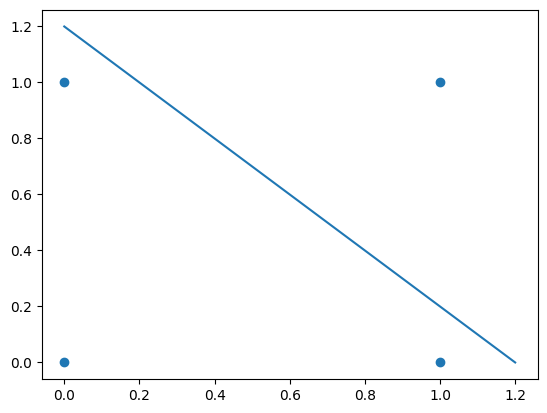

In [7]:
import matplotlib.pyplot as plt  
import numpy as np  
# отрисовка разделяющей плоскости
plt.figure()
ax = plt.axes()
w1, w2 = df_experiments.iloc[0]['Weights']
b = df_experiments.iloc[0]['b']
points = [[0, w2 + b], [w1 + b, 0]]
ax.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]])
ax.scatter(table[:,0], table[:, 1])
plt.show()